In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('BF_data.csv', index_col=[0])
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,SAT_1,SAT_2,SAT_3,SAT_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,121.0,2.0,22.22,21.00,3.88,69.940478,73.583364,77.713731,82.332439,85.074844
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,125.0,1.0,22.56,21.00,3.94,71.454476,74.666066,77.198904,82.604995,84.877672
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,124.0,1.0,22.49,21.08,3.94,70.579462,74.837214,78.518159,84.475989,83.397999
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,115.0,1.0,22.36,21.13,3.99,70.179791,75.008361,80.865417,84.880888,83.368013
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,1.0,22.25,21.30,4.10,70.728470,75.799102,82.564532,84.282448,84.592822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26471 entries, 0 to 26470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      26471 non-null  object 
 1   CB_FLOW        26471 non-null  float64
 2   CB_PRESS       26471 non-null  float64
 3   CB_TEMP        26471 non-null  float64
 4   STEAM_FLOW     26471 non-null  float64
 5   STEAM_TEMP     26471 non-null  float64
 6   STEAM_PRESS    26471 non-null  float64
 7   O2_PRESS       26471 non-null  float64
 8   O2_FLOW        26471 non-null  float64
 9   O2_PER         26471 non-null  float64
 10  PCI            26471 non-null  float64
 11  ATM_HUMID      26471 non-null  float64
 12  HB_TEMP        26471 non-null  float64
 13  HB_PRESS       26471 non-null  float64
 14  TOP_PRESS      26471 non-null  float64
 15  TOP_TEMP1      26471 non-null  float64
 16  TOP_TEMP2      26471 non-null  float64
 17  TOP_TEMP3      26471 non-null  float64
 18  TOP_TE

In [4]:
x_vars = df.drop(['SAT_1','SAT_2','SAT_3','SAT_4'],axis=1)
x_vars.drop('DATE_TIME',axis=1,inplace=True)
y_vars = df[['SAT_1','SAT_2','SAT_3','SAT_4']]

print(x_vars.shape, y_vars.shape)

(26471, 25) (26471, 4)


In [5]:
x_vars.head()

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,32.0,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,30.0,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,31.0,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,36.0,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,36.0,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470


In [6]:
y_vars.head()

,SAT_1,SAT_2,SAT_3,SAT_4
0,73.583364,77.713731,82.332439,85.074844
1,74.666066,77.198904,82.604995,84.877672
2,74.837214,78.518159,84.475989,83.397999
3,75.008361,80.865417,84.880888,83.368013
4,75.799102,82.564532,84.282448,84.592822


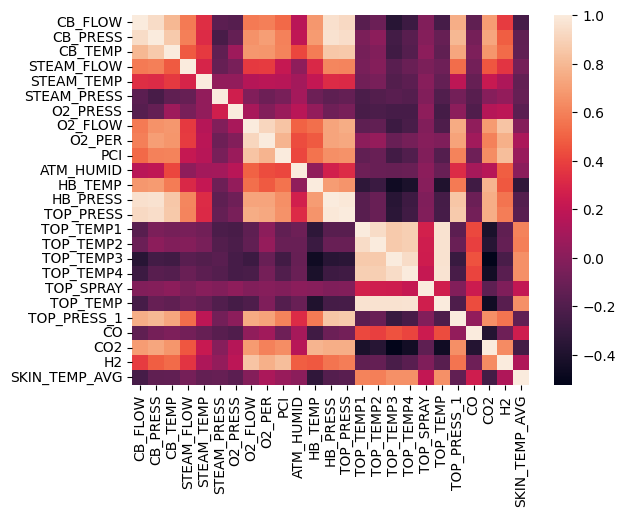

In [7]:
corr_matrix = x_vars.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size=0.3,  random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
regressor = RandomForestRegressor(n_estimators=400, max_depth=100)

In [10]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=400)

In [11]:
y_pred = regressor.predict(x_test)

In [12]:
cols = y_vars.columns.to_list()
y_pred = pd.DataFrame(y_pred, columns= cols)

In [13]:
y_pred

,SAT_1,SAT_2,SAT_3,SAT_4
0,55.709714,58.230203,58.467698,60.476332
1,60.151889,62.147288,64.580150,68.109006
2,91.690315,92.251810,92.657302,93.404104
3,48.414632,50.846416,52.387909,52.251407
4,57.105111,56.425792,54.067807,52.808002
...,...,...,...,...
7937,70.738565,70.820753,72.786147,71.922838
7938,51.705395,52.028925,52.086176,53.405817
7939,95.666032,94.549504,87.065620,82.443938
7940,111.708649,99.255735,84.878713,82.708110


In [14]:
r2_score(y_test, y_pred)
print(f"The accuracy of the ANN model is : {round(r2_score(y_test, y_pred)*100,4)}")

The accuracy of the ANN model is : 94.812


In [15]:
import joblib
joblib.dump(regressor, 'random_forest.pkl')

['random_forest.pkl']

In [16]:
row = np.array([311727,3.15,129,4,213,3.34,3.2,7296,23.08,32,24.56,1060,2.99,1.5,112,135,107,130,0,121,2,22.22,21,3.88,69.94])
row = scaler.transform([row])
X = pd.DataFrame(row, columns=x_vars.columns.to_list())
prediction = regressor.predict(X)
prediction

C:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([[72.63237992, 75.3429468 , 78.44603661, 80.25920933]])

In [17]:
x_vars.columns.to_list()

['CB_FLOW',
 'CB_PRESS',
 'CB_TEMP',
 'STEAM_FLOW',
 'STEAM_TEMP',
 'STEAM_PRESS',
 'O2_PRESS',
 'O2_FLOW',
 'O2_PER',
 'PCI',
 'ATM_HUMID',
 'HB_TEMP',
 'HB_PRESS',
 'TOP_PRESS',
 'TOP_TEMP1',
 'TOP_TEMP2',
 'TOP_TEMP3',
 'TOP_TEMP4',
 'TOP_SPRAY',
 'TOP_TEMP',
 'TOP_PRESS_1',
 'CO',
 'CO2',
 'H2',
 'SKIN_TEMP_AVG']